In [52]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection   
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

### Loading the data and cleaning the data


In [53]:
Job_posting = pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\job posting scam\deceptive-opinion.csv")


In [54]:
Job_posting.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catching up on my reviews from the past several months:)...
3,truthful,omni,positive,TripAdvisor,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu..."
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...


In [55]:
# remove the extra columns 
Job_posting=Job_posting.drop(['hotel','polarity','source'], axis=1)


In [56]:
Job_posting.head()

,deceptive,text
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu..."
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...


### Feature engneering 

In [57]:
print("Youtube data has {} rows and {} columns".format(len(Job_posting), len(Job_posting.columns)))

Youtube data has 1600 rows and 2 columns


In [58]:
print("Out of {} rows, {} are scam , {} are not scam".format(len(Job_posting),
                                                       len(Job_posting[Job_posting['deceptive']=='truthful']),
                                                       len(Job_posting[Job_posting['deceptive']=='deceptive'])))

Out of 1600 rows, 800 are scam , 800 are not scam


In [59]:
# Measure the % of punctuation
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

Job_posting['punct%'] = Job_posting['text'].apply(lambda x: punct_count(x))

Job_posting.head()

,deceptive,text,punct%
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2


In [60]:
# Measure the length of the post 

Job_posting['body_len'] = Job_posting['text'].apply(lambda x: len(x) - x.count(" "))

Job_posting.head()

,deceptive,text,punct%,body_len
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9,467
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6,241
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1,897
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9,580
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2,312


### Obtaning the plot of punct%	body_len and Transform the data

In [61]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

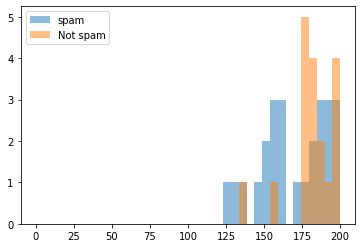

In [62]:
bins = np.linspace(0, 200, 40)

pyplot.hist(Job_posting[Job_posting['deceptive']=='deceptive']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(Job_posting[Job_posting['deceptive']=='truthful']['body_len'], bins, alpha=0.5, label='Not spam')
pyplot.legend(loc='upper left')
pyplot.show()

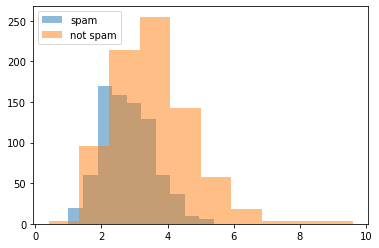

In [63]:
pyplot.hist(Job_posting[Job_posting['deceptive']=='deceptive']['punct%'], alpha=0.5, label='spam')
pyplot.hist(Job_posting[Job_posting['deceptive']=='truthful']['punct%'], alpha=0.5, label='not spam')
pyplot.legend(loc='upper left')
pyplot.show()

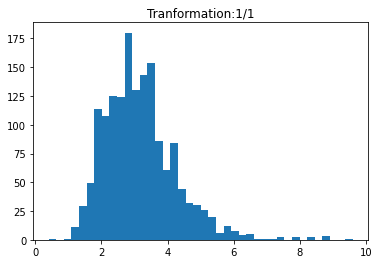

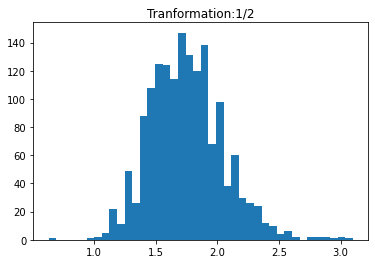

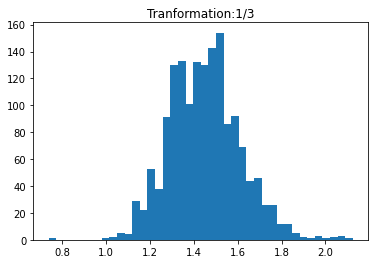

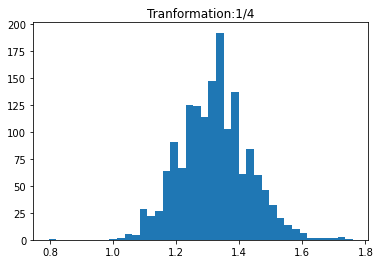

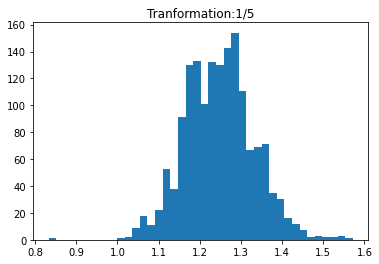

In [64]:
for i in [1,2,3,4,5]:
    pyplot.hist((Job_posting['punct%'])**(1/i),bins=40)
    pyplot.title("Tranformation:1/{}".format(str(i)))
    pyplot.show()

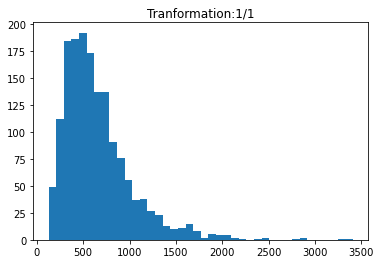

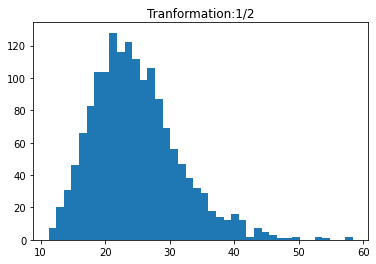

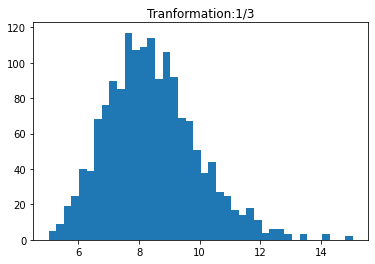

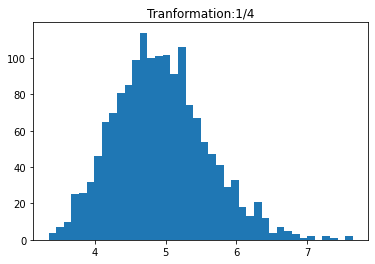

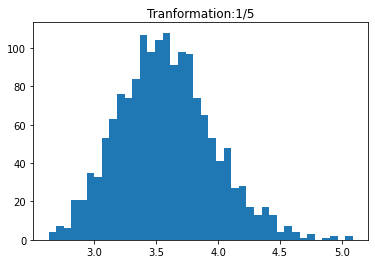

In [65]:
for i in [1,2,3,4,5]:
    pyplot.hist((Job_posting['body_len'])**(1/i),bins=40)
    pyplot.title("Tranformation:1/{}".format(str(i)))
    pyplot.show()    

In [66]:
# Transform punct%

#Job_posting['punct%']=Job_posting['punct%']**(1/2)

# Transform body_len

Job_posting['body_len']=Job_posting['body_len']**(1/5)

In [67]:
Job_posting.head()

,deceptive,text,punct%,body_len
0,truthful,We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal....,3.9,3.418719
1,truthful,Triple A rate with upgrade to view room was less than $200 which also included breakfast voucher...,4.6,2.995045
2,truthful,This comes a little late as I'm finally catching up on my reviews from the past several months:)...,3.1,3.895458
3,truthful,"The Omni Chicago really delivers on all fronts, from the spaciousness of the rooms to the helpfu...",2.9,3.570143
4,truthful,I asked for a high floor away from the elevator and that is what I got. The room was pleasantly ...,2.2,3.153777


### USE NLTK to create tokens, remove punctuation and remove stop words

In [68]:
def text_clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [69]:
# Use TfidfVectorizer to transform the data 

tfidf_vect = TfidfVectorizer(analyzer=text_clean)
X_tfidf = tfidf_vect.fit_transform(Job_posting['text'])


X_features = pd.concat([Job_posting['body_len'], Job_posting['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654
0,3.418719,3.9,0.026911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.995045,4.6,0.036858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.895458,3.1,0.021416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.570143,2.9,0.027051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.153777,2.2,0.047209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# try out cross validation to obtian what section of the data produce the vest accuracy 
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, Job_posting['deceptive'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.25    , 0.759375, 0.75    , 0.6875  , 0.196875])

In [71]:
# Split the data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X_features, Job_posting['deceptive'], test_size=0.2)

In [72]:
# Obtaing the top features in the data

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [73]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.03494852772214082, 1490),
 (0.023844538280571603, 'punct%'),
 (0.022677167602009343, 4150),
 (0.011944892564986227, 4091),
 (0.009866965903152915, 3455),
 (0.009781917842154049, 4068),
 (0.00959547025061367, 2838),
 (0.008739438652855392, 1132),
 (0.008357324574889982, 0),
 (0.008082089459168615, 5958)]

#### Using random forest and TfidfVectorizer to predict the Spam comments 

In [74]:
# Obtaining precision, recall, accuracy, support
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='deceptive', average='binary')

In [75]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.86 / Recall: 0.826 / Accuracy: 0.828


### Using RF, TfidfVectorizer and Grid seach to obtain the tree with the least performace 

In [76]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='deceptive', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [77]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.884 / Recall: 0.73 / Accuracy: 0.797
Est: 10 / Depth: 20 ---- Precision: 0.798 / Recall: 0.775 / Accuracy: 0.766
Est: 10 / Depth: 30 ---- Precision: 0.817 / Recall: 0.702 / Accuracy: 0.747
Est: 10 / Depth: None ---- Precision: 0.764 / Recall: 0.82 / Accuracy: 0.759
Est: 50 / Depth: 10 ---- Precision: 0.893 / Recall: 0.798 / Accuracy: 0.834
Est: 50 / Depth: 20 ---- Precision: 0.856 / Recall: 0.837 / Accuracy: 0.831
Est: 50 / Depth: 30 ---- Precision: 0.917 / Recall: 0.865 / Accuracy: 0.881
Est: 50 / Depth: None ---- Precision: 0.858 / Recall: 0.882 / Accuracy: 0.853
Est: 100 / Depth: 10 ---- Precision: 0.885 / Recall: 0.865 / Accuracy: 0.862
Est: 100 / Depth: 20 ---- Precision: 0.856 / Recall: 0.837 / Accuracy: 0.831
Est: 100 / Depth: 30 ---- Precision: 0.886 / Recall: 0.876 / Accuracy: 0.869
Est: 100 / Depth: None ---- Precision: 0.887 / Recall: 0.882 / Accuracy: 0.872


### Compareing the results of RF with the TfidfVectorizer and the counter vectorized for the top pram combination

In [78]:
# Results for the TfidfVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, Job_posting['deceptive'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
8,18.736860,0.299161,0.856250,90,300,"{'max_depth': 90, 'n_estimators': 300}",1,0.862500,0.840625,0.865625,0.862500,0.85000,0.875567,0.042336,0.009479
5,16.533151,0.286207,0.851875,60,300,"{'max_depth': 60, 'n_estimators': 300}",2,0.868750,0.850000,0.859375,0.843750,0.83750,0.285667,0.051170,0.011110
11,13.183269,0.231758,0.846250,None,300,"{'max_depth': None, 'n_estimators': 300}",3,0.875000,0.834375,0.859375,0.843750,0.81875,0.164029,0.018320,0.019506
10,8.774943,0.213270,0.844375,None,150,"{'max_depth': None, 'n_estimators': 150}",4,0.868750,0.840625,0.843750,0.843750,0.82500,1.131184,0.029238,0.014031
2,14.342194,0.314898,0.838125,30,300,"{'max_depth': 30, 'n_estimators': 300}",5,0.859375,0.840625,0.843750,0.828125,0.81875,0.652855,0.062199,0.013891


In [79]:
# obtaing CountVectorizer
count_vect = CountVectorizer(analyzer=text_clean)
X_count = count_vect.fit_transform(Job_posting['text'])
X_count_feat = pd.concat([Job_posting['body_len'], Job_posting['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654
0,3.418719,3.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.995045,4.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.895458,3.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.570143,2.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.153777,2.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Results for the CountVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=2, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, Job_posting['text'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\fatma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,std_fit_time,std_score_time,std_test_score
1,4.471232,2.234938,0.005,30,150,"{'max_depth': 30, 'n_estimators': 150}",1,0.005,0.005,0.018871,0.025515,0.0
2,10.550625,7.019731,0.005,30,300,"{'max_depth': 30, 'n_estimators': 300}",1,0.005,0.005,0.544037,0.889954,0.0
4,9.107897,4.041731,0.005,60,150,"{'max_depth': 60, 'n_estimators': 150}",1,0.005,0.005,0.874712,0.196094,0.0
5,18.521316,5.802092,0.005,60,300,"{'max_depth': 60, 'n_estimators': 300}",1,0.005,0.005,1.120084,0.521413,0.0
7,13.748563,3.170586,0.005,90,150,"{'max_depth': 90, 'n_estimators': 150}",1,0.005,0.005,0.712648,0.022648,0.0


### Duplicating the tests using GradientBoostingClassifier

In [80]:
# Using GB and Grid seach to obtain the tree with the least performace 
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='deceptive', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [81]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.788 / Recall: 0.73 / Accuracy: 0.741
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.839 / Recall: 0.792 / Accuracy: 0.8
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.83 / Recall: 0.848 / Accuracy: 0.819
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.762 / Recall: 0.736 / Accuracy: 0.725
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.855 / Recall: 0.826 / Accuracy: 0.825
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.843 / Recall: 0.843 / Accuracy: 0.825
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.742 / Recall: 0.758 / Accuracy: 0.719
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.804 / Recall: 0.809 / Accuracy: 0.784
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.854 / Recall: 0.82 / Accuracy: 0.822
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.741 / Recall: 0.77 / Accuracy: 0.722
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.77 / Recall: 0.792 / Accuracy: 0.753
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.831 / Recall: 0.803 / A

### Final comparsion of TfidfVectorizer in RF and GB To select the best model

###Vectorizing on only the traning set not the entire set

In [82]:
X_train, X_test, y_train, y_test = train_test_split(Job_posting[['text', 'body_len', 'punct%']], Job_posting['deceptive'], test_size=0.2)

In [83]:
tfidf_vect = TfidfVectorizer(analyzer=text_clean)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846
0,3.110130,1.7,0.046302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.924551,4.6,0.019520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.507671,3.6,0.027588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.693102,4.2,0.025795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.568911,3.3,0.030674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Evaluating RF vs GB


In [88]:
import time
rf = RandomForestClassifier(n_estimators=150, max_depth=10, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='deceptive', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.565 / Predict time: 0.187 ---- Precision: 0.857 / Recall: 0.862 / Accuracy: 0.859


In [91]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=7)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='deceptive', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 59.576 / Predict time: 0.07 ---- Precision: 0.816 / Recall: 0.831 / Accuracy: 0.822


In [ ]:
# The values of n_estimators and max_depth were chosen based on the best values of accuracy obtained from the Grid search

In [92]:
# based on the reults we decide that RF is faster and produced accurate results and therefore RF with TfidfVectorizer is the best model to predict the spam job post